<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Curve_fit_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Example of an interactive curve fitting plot using the scipy Python library
%pylab inline
from scipy.optimize import curve_fit
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate data if you don't have any already.
n = 20
g = 9.806
v0 = 12.22
y0 = 0.33
sy = 0.5
data_x = linspace(0,2,n)
data_y = y0 + v0*data_x - 0.5*g*data_x**2 + randn(n)*sy
data_sy = sy + randn(n)*sy/10

d = pd.DataFrame(data={'time':[round(x,2) for x in data_x],
                       'pos':[round(x,2) for x in data_y],
                       's_pos':[round(x,2) for x in data_sy]})

# Save this data to a file if you want:
# d.to_excel("data.xls")

In [4]:
# Read in data if you already have some
# d = pd.read_excel("data.xls")
# d

Text(0.5, 0, 'time (s)')

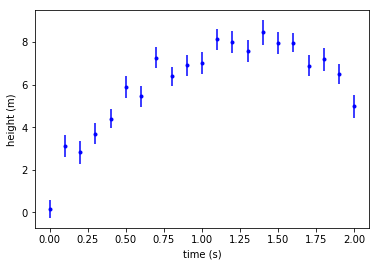

In [ ]:
# Plot data
errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.')
ylabel("height (m)")
xlabel("time (s)")

m: 2.56 +/- 0.18
b: 3.44 +/- 0.20
covariance:
[[ 0.03092192 -0.03028848]
 [-0.03028848  0.04114759]]


Text(0.5, 0, 'time (s)')

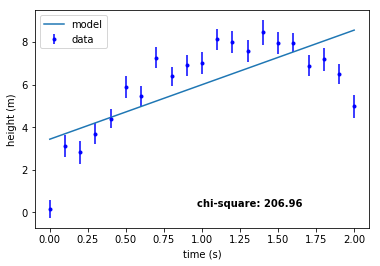

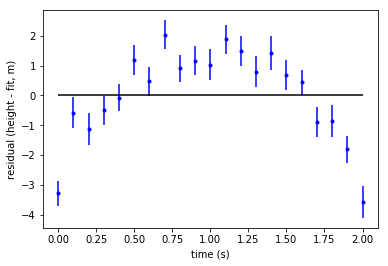

In [ ]:
# A simple linear fit

# Set up the model
def model(x,m,b):
    return m*x+b

# Do the fit
init_guess = [1,1]
fit = curve_fit(model, d['time'],d['pos'], sigma=d['s_pos'], p0=init_guess, absolute_sigma=True)

# Unpack the results
ans,cov = fit
fit_m,fit_b = ans
fit_sm,fit_sb = sqrt(diag(cov))

# Print the fit results:
print("m: %.2f +/- %.2f"%(fit_m,fit_sm))
print("b: %.2f +/- %.2f"%(fit_b,fit_sb))

# Plot the data and fit results
errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.', label="data")
ylabel("height (m)")
xlabel("time (s)")
print("covariance:")
print(cov)

t = linspace(0,2)
plot(t,model(t,fit_m,fit_b), label="model")
legend()

# Compute chi-square
chisq = sum((d['pos'] - model(d['time'],fit_m,fit_b))**2/d['s_pos']**2)
figtext(0.5,0.2,"chi-square: %.2f"%chisq,fontweight="bold")


# Make a residuals plot
figure()
errorbar(d['time'],d['pos']-model(d['time'],fit_m,fit_b),d['s_pos'],fmt='b.')
hlines(0,d['time'].min(),d['time'].max())
ylabel("residual (height - fit, m)")
xlabel("time (s)")

y0: 0.75 +/- 0.28
v0: 11.29 +/- 0.67
a: -8.81 +/- 0.65
covariance:
[[ 0.08026634 -0.15748225  0.12845852]
 [-0.15748225  0.44448966 -0.41768005]
 [ 0.12845852 -0.41768005  0.42183325]]


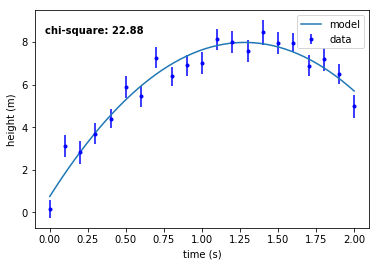

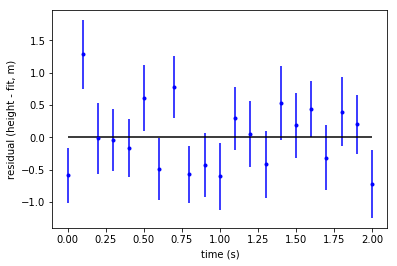

In [ ]:
# A quadratic fit

# Set up the model
def model(t,y0,v0,a):
    return y0 + v0*t + 0.5*a*t**2

# Do the fit
init_guess = [1,1,-10]
fit = curve_fit(model, d['time'],d['pos'], sigma=d['s_pos'], p0=init_guess, absolute_sigma=True)

# Unpack the results
ans,cov = fit
fit_y0,fit_v0,fit_a = ans
fit_sy0,fit_sv0,fit_sa = sqrt(diag(cov))

# Print the fit results
print("y0: %.2f +/- %.2f"%(fit_y0,fit_sy0))
print("v0: %.2f +/- %.2f"%(fit_v0,fit_sv0))
print("a: %.2f +/- %.2f"%(fit_a,fit_sa))
print("covariance:")
print(cov)

# Plot the fit results
errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.', label="data")
ylabel("height (m)")
xlabel("time (s)")

t = linspace(0,2)
plot(t,model(t,fit_y0,fit_v0,fit_a), label="model")
legend()

# Compute chi-square
chisq = sum((d['pos'] - model(d['time'],fit_y0,fit_v0,fit_a))**2/d['s_pos']**2)
figtext(0.15,0.8,"chi-square: %.2f"%chisq,fontweight="bold")

# Make a residuals plot
figure()
errorbar(d['time'],d['pos']-model(d['time'],fit_y0,fit_v0,fit_a),d['s_pos'],fmt='b.')
hlines(0,d['time'].min(),d['time'].max())
ylabel("residual (height - fit, m)")
xlabel("time (s)")
savefig("residuals.pdf")